In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
df = pd.read_csv('Final_Augmented_dataset_Diseases_and_Symptoms.csv')

# Display the first few rows
print(df.head())

# Basic statistics and information
print(df.info())
print(df.describe())

# Checking for missing values
print(df.isnull().sum())


         diseases  anxiety and nervousness  depression  shortness of breath  \
0  panic disorder                        1           0                    1   
1  panic disorder                        0           0                    1   
2  panic disorder                        1           1                    1   
3  panic disorder                        1           0                    0   
4  panic disorder                        1           1                    0   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                                 1                 0          0         0   
1                                 1                 0          1         1   
2                                 1                 0          1         1   
3                                 1                 0          1         1   
4                                 0                 0          0         1   

   abnormal involuntary movements  chest tightness  ... 

In [ ]:
# Handling missing values (if any)
df = df.dropna()
print(df.columns)  # Print the list of columns

# Split data into features (X) and target (y)
X = df.drop('diseases', axis=1)
y = df['diseases']

# Encode the target variable if it's categorical
y = pd.get_dummies(y, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)


In [ ]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5
           7       1.00      0.95      0.97        19
           8       1.00      0.99      1.00       193
           9       0.80      1.00      0.89         4
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         9
          12       0.00      0.00      0.00         1
          13       1.00      0.97      0.99        39
          14       1.00      1.00      1.00        19

   micro avg       1.00      0.99      0.99       475
   macro avg       0.79      0.79      0.79       475
weighted avg       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix



# Convert predictions to label indices
y_pred_indices = np.argmax(y_pred, axis=1)
y_test_indices = np.argmax(y_test.values, axis=1)  # Convert y_test to NumPy array

# Calculate confusion matrix for each label
cm = multilabel_confusion_matrix(y_test_indices, y_pred_indices)

# Print or visualize the confusion matrices
for i, matrix in enumerate(cm):
    print(f"Confusion matrix for label {i}:")
    print(matrix)

Confusion matrix for label 0:
[[441   3]
 [  0  97]]
Confusion matrix for label 1:
[[455   0]
 [  0  86]]
Confusion matrix for label 2:
[[520   0]
 [  0  21]]
Confusion matrix for label 3:
[[504   0]
 [  0  37]]
Confusion matrix for label 4:
[[530   0]
 [  0  11]]
Confusion matrix for label 5:
[[536   0]
 [  0   5]]
Confusion matrix for label 6:
[[522   0]
 [  1  18]]
Confusion matrix for label 7:
[[348   0]
 [  1 192]]
Confusion matrix for label 8:
[[536   1]
 [  0   4]]
Confusion matrix for label 9:
[[532   0]
 [  0   9]]
Confusion matrix for label 10:
[[540   0]
 [  1   0]]
Confusion matrix for label 11:
[[502   0]
 [  1  38]]
Confusion matrix for label 12:
[[522   0]
 [  0  19]]


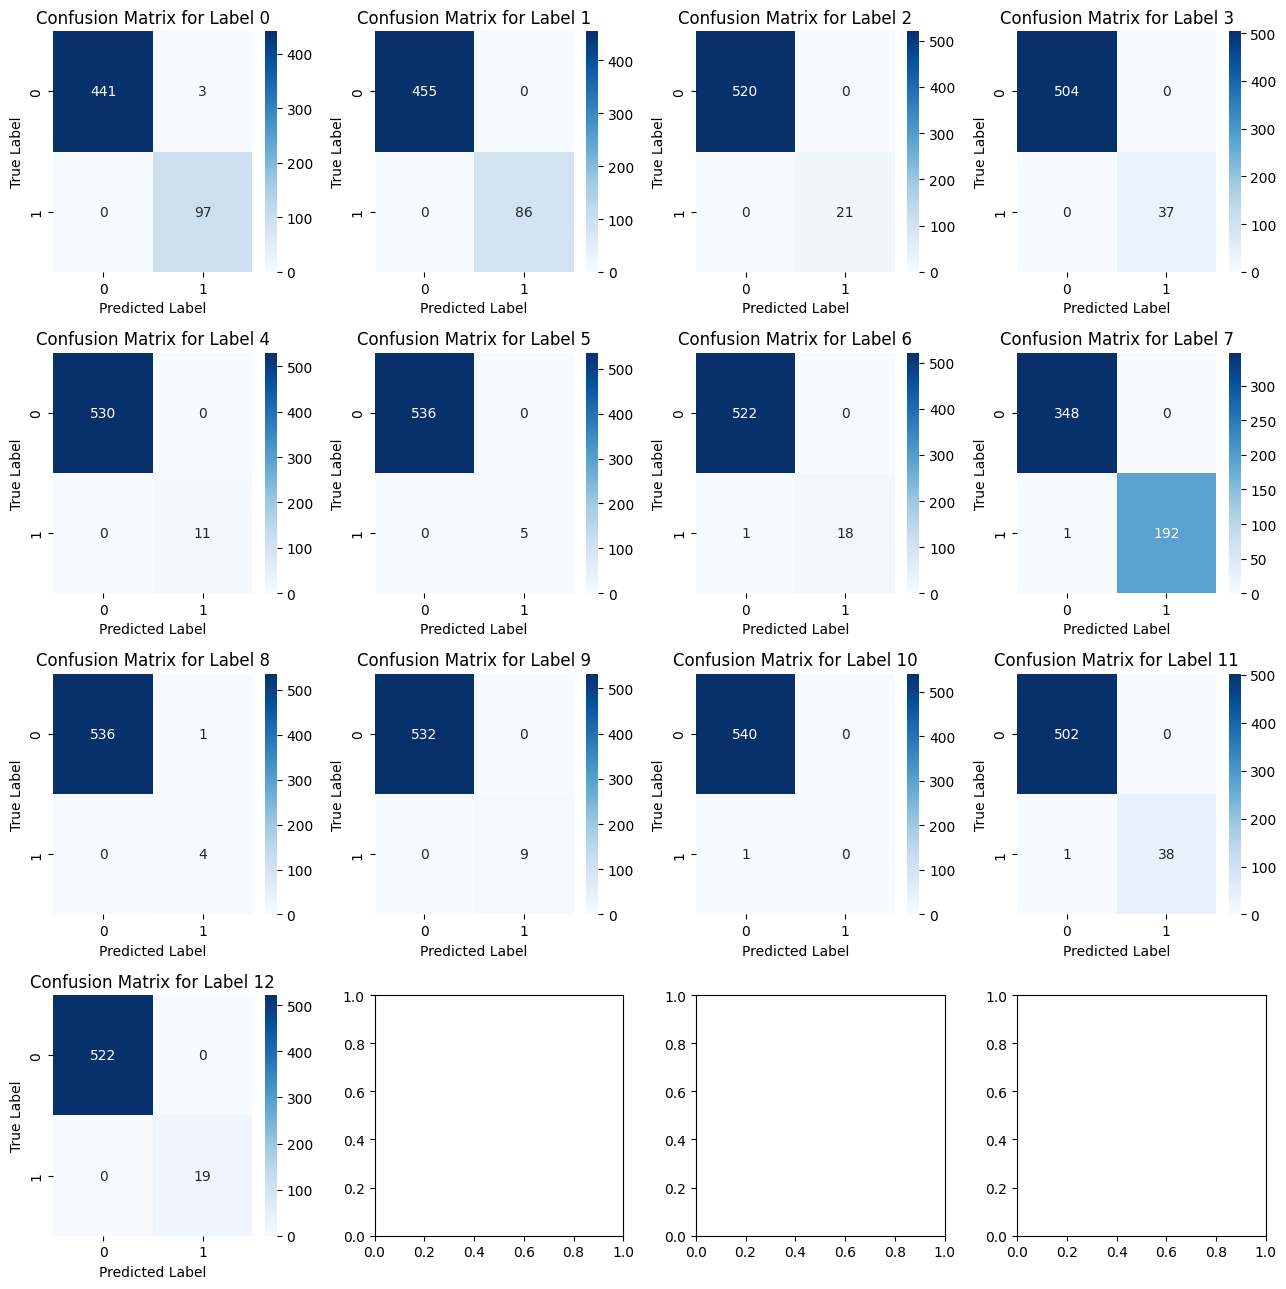

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Visualize confusion matrices
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i, matrix in enumerate(cm):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for Label {i}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Adjust layout and display plot
plt.tight_layout()
plt.show()

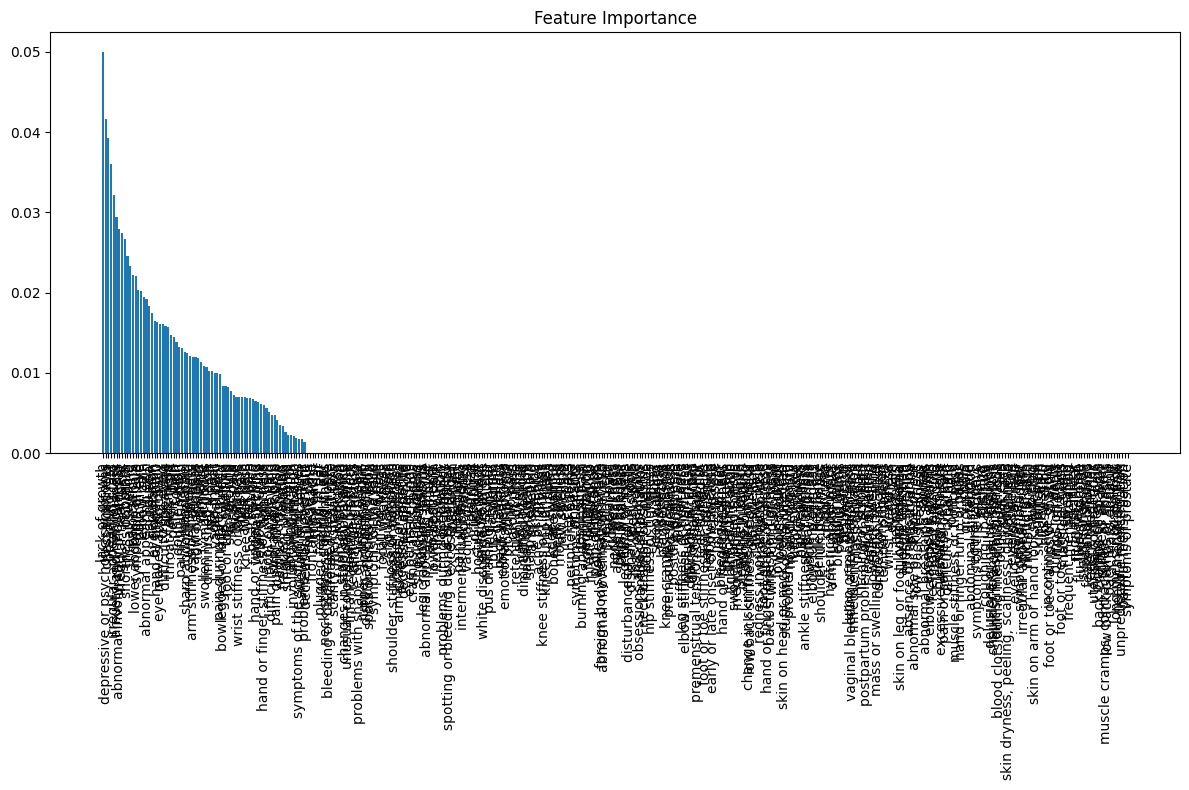

In [ ]:
# Plotting feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


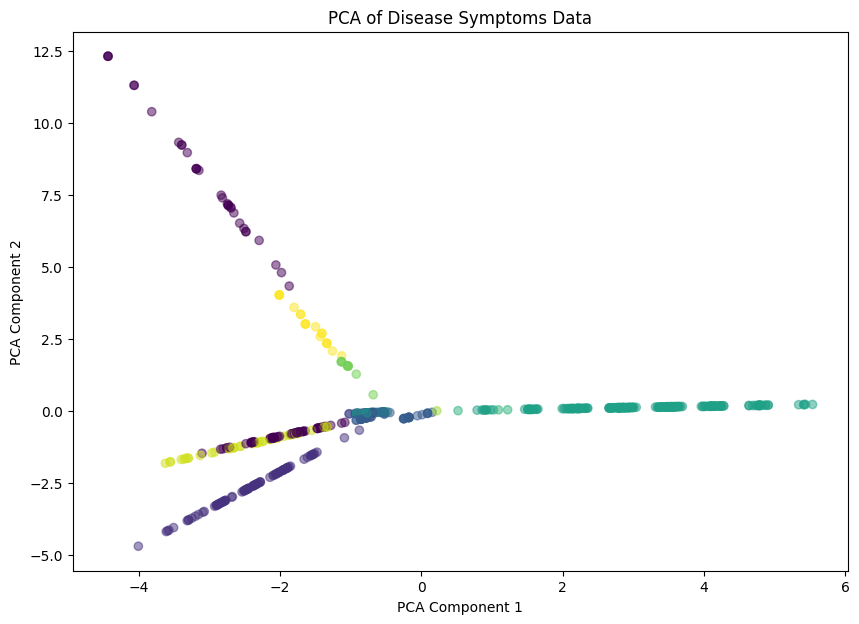

In [ ]:
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test.values.argmax(axis=1), cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Disease Symptoms Data')
plt.show()


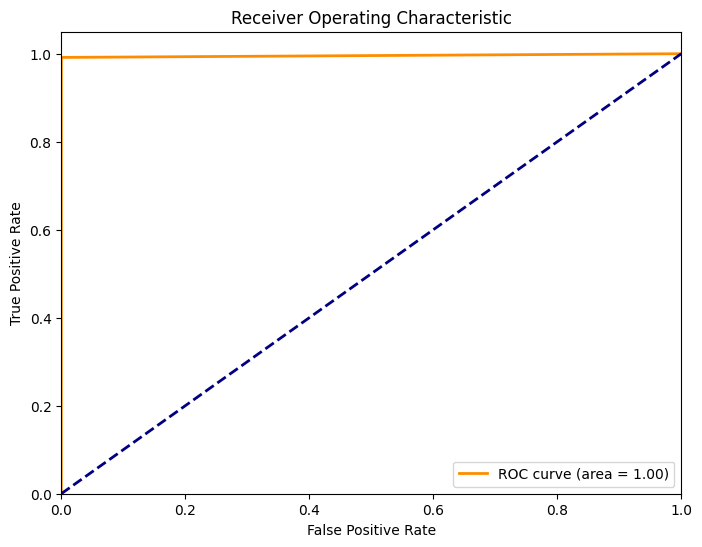

In [ ]:
# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import shap

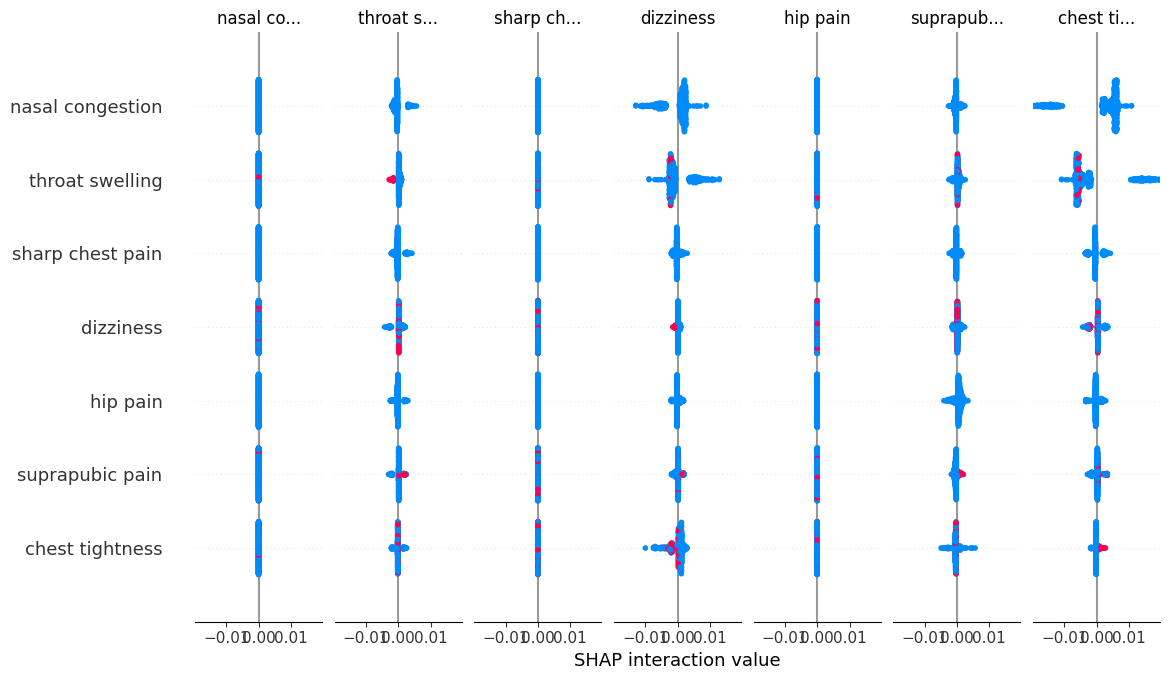

In [ ]:
# SHAP values for interpretability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [ ]:
# Calculate and print the accuracy of the model
from sklearn.metrics import accuracy_score  # Import the accuracy_score function
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.26%
